In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elenavarlamova03","key":"a57615240509cf47be3fdc35b8ce5000"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ERROR: Could not find a version that satisfies the requirement keras.applications.InceptionV3 (from versions: none)
ERROR: No matching distribution found for keras.applications.InceptionV3


In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
from timeit import default_timer as timer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

In [ ]:
#data = pd.read_pickle("drive/MyDrive/Signs/data2.pickle")

dict_keys(['y_test', 'y_validation', 'x_validation', 'x_train', 'y_train', 'labels', 'x_test'])

In [ ]:
with open('drive/MyDrive/Signs/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# Preparing y_train and y_validation for using in Keras
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)
data.keys()

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


In [ ]:
x_train = data['x_train']
x_test = data['x_test']
x_val = data['x_validation']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_validation']
train_count=x_train.shape[0]
val_count=x_val.shape[0]
NumberofClass = 43

In [ ]:
#вывод 
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("x validation shape:", x_val.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)
print("y validation shape:", y_val.shape)
print("train count :", train_count)

x train shape: (86989, 32, 32, 3)
x test shape: (12630, 32, 32, 3)
x validation shape: (4410, 32, 32, 3)
y train shape: (86989, 43)
y test shape: (12630,)
y validation shape: (4410, 43)
train count : 86989


In [ ]:
'''
x_train = x_train.swapaxes(1,2)
x_tr
ain.shape
'''
'''
def cnt_img_in_classes(labels):
    count = {}
    for i in labels:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    return count

samples_distribution = cnt_img_in_classes (y_train)

def diagram(count_classes):
    plt.bar(range(len()), sorted(list(count_classes.values())), align='center')
    plt.xticks(range(len(count_classes)), sorted(list(count_classes.keys())), rotation=90, fontsize=7)
    plt.show()
diagram(samples_distribution)
'''

TypeError: ignored

In [ ]:
'''
x_train = x_train.swapaxes(2,3)
x_train.shape
'''

(86989, 32, 32, 3)

In [ ]:
'''
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)
print("x val shape:", x_val.shape)
'''

x val shape: (4410, 32, 32, 3)


(81, 32, 32, 3)


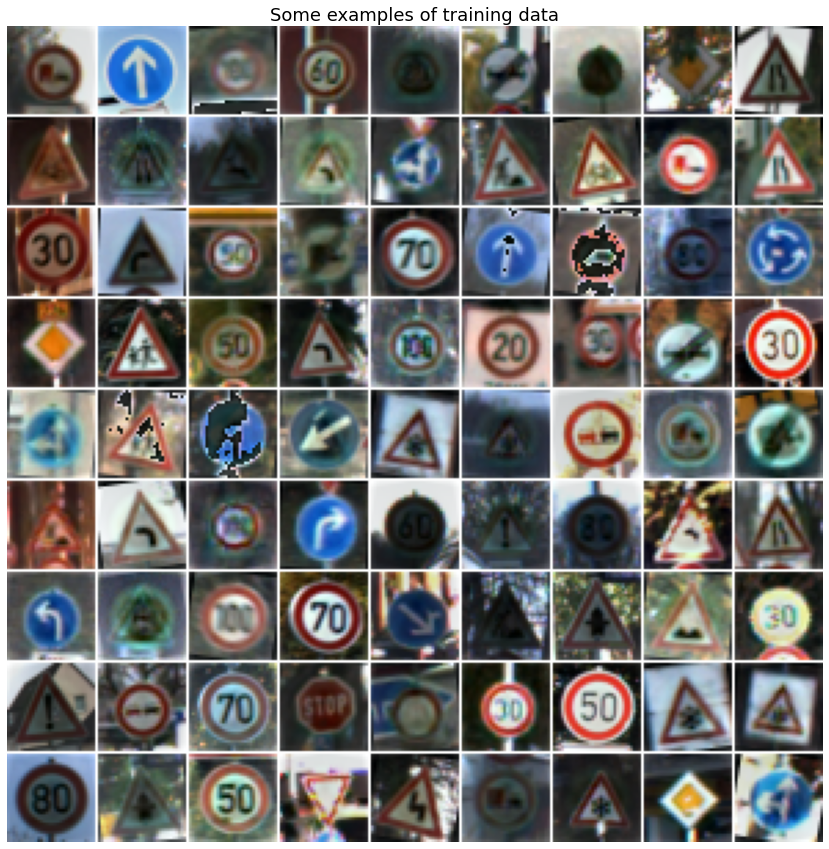

In [ ]:
def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid


# Visualizing some examples of training data
examples = x_train[161:242, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

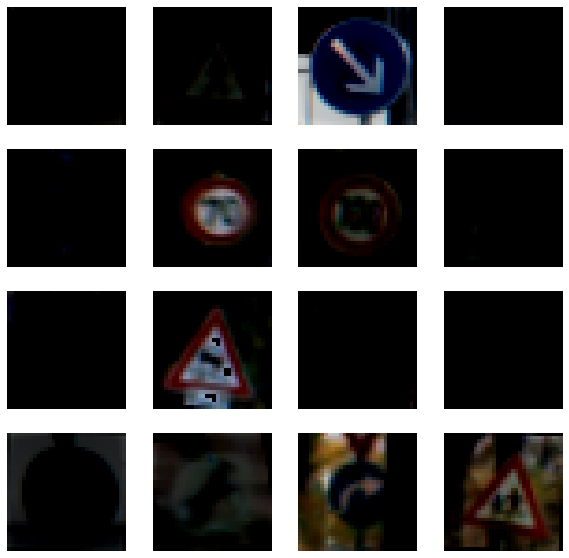

In [ ]:
'''
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)   
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()
'''

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


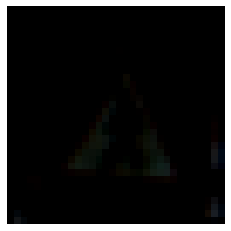

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


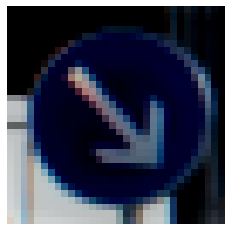

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


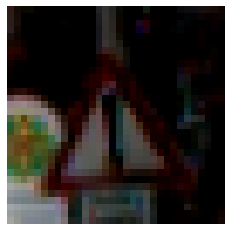

In [ ]:
'''
img_list = [1,2,17]
for i in img_list:
    plt.imshow(x_train[i],cmap = "gray")
    plt.axis("off")
    plt.show()
'''

In [ ]:
'''
def resize(img):
    numberofImage = img.shape[0]
    new_array = np.zeros((numberofImage,64,64,3))
    for i in range(numberofImage):
        new_array[i] = tf.image.resize(img[i],(64,64))
    return new_array
'''

In [ ]:
'''
x_train_resized = resize(x_train)
x_val_resized = resize(x_val)
print("x train resized shape:", x_train_resized.shape)
print("x validation resized shape:", x_val_resized.shape)
'''

x train resized shape: (86989, 64, 64, 3)
x validation resized shape: (4410, 64, 64, 3)


In [ ]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (32,32,3)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same", activation = "relu" ))


model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = NumberofClass, activation = "softmax"))

In [ ]:
# структура СНС
model = Sequential()


model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (32,32,3)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = NumberofClass, activation = "softmax"))

In [ ]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])#"adam"
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [ ]:
batch_size = 200
start = timer()
hist = model.fit(x_train, y_train,
                    epochs = 50, steps_per_epoch=train_count//batch_size,validation_data = (x_val, y_val))
end = timer()

Epoch 1/50
434/434 [==============================] - 12s 26ms/step - loss: 2.6237 - accuracy: 0.2175 - val_loss: 1.7259 - val_accuracy: 0.4263
Epoch 2/50
434/434 [==============================] - 11s 26ms/step - loss: 1.2347 - accuracy: 0.5976 - val_loss: 1.1098 - val_accuracy: 0.6401
Epoch 3/50
434/434 [==============================] - 11s 25ms/step - loss: 0.6283 - accuracy: 0.7967 - val_loss: 0.8265 - val_accuracy: 0.7780
Epoch 4/50
434/434 [==============================] - 11s 25ms/step - loss: 0.3538 - accuracy: 0.8873 - val_loss: 0.7325 - val_accuracy: 0.8259
Epoch 5/50
434/434 [==============================] - 11s 25ms/step - loss: 0.2290 - accuracy: 0.9278 - val_loss: 0.7005 - val_accuracy: 0.8390
Epoch 6/50
434/434 [==============================] - 11s 26ms/step - loss: 0.1648 - accuracy: 0.9491 - val_loss: 0.6081 - val_accuracy: 0.8821
Epoch 7/50
434/434 [==============================] - 11s 26ms/step - loss: 0.1245 - accuracy: 0.9617 - val_loss: 0.6672 - val_accuracy:

In [ ]:
print('data2 classification time = {0:.5f}'.format(end - start))

data2 classification time = 627.26669


In [ ]:
scores = model.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.70%


In [ ]:
from keras.models import Model
from matplotlib import pyplot
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img
layer_out=[layer.output for layer in model.layers[1:]]
visualize= Model(inputs=model.input,outputs=layer_out)
image=load_img('drive/MyDrive/Signs/Sign_1.png')
image.show()
im1 = image.resize((32,32))
im1.show()
x = img_to_array(im1)
x.shape
x=x.reshape((1,32,32,3))
x=x/255


In [ ]:
feature_map=visualize.predict(x)
print(len(feature_map))

13


In [ ]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)

['conv2d_29', 'max_pooling2d_29', 'conv2d_30', 'max_pooling2d_30', 'conv2d_31', 'max_pooling2d_31', 'conv2d_32', 'max_pooling2d_32', 'conv2d_33', 'max_pooling2d_33', 'flatten_7', 'dense_14', 'dropout_7', 'dense_15']


(1, 16, 16, 128)
(1, 16, 16, 64)
(1, 8, 8, 64)
(1, 8, 8, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


(1, 2, 2, 32)
(1, 2, 2, 16)
(1, 1, 1, 16)
(1, 16)
(1, 512)
(1, 512)
(1, 43)


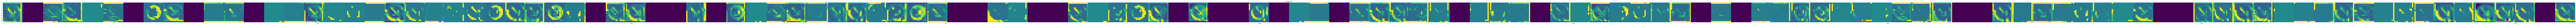

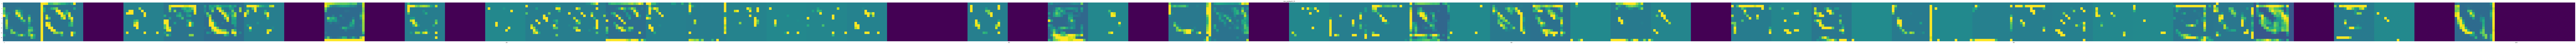

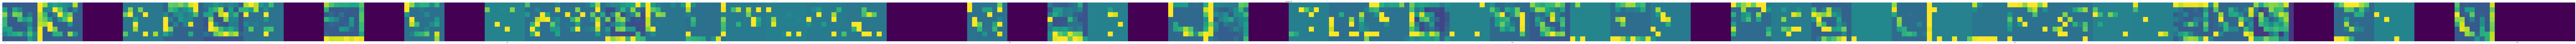

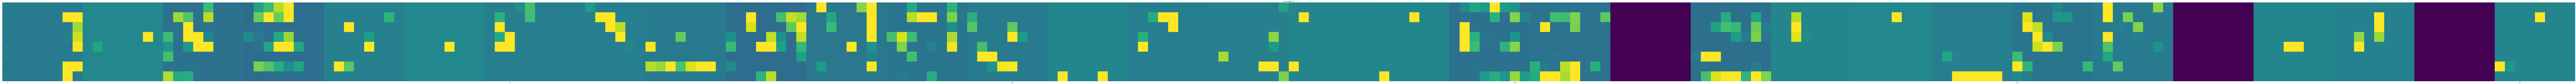

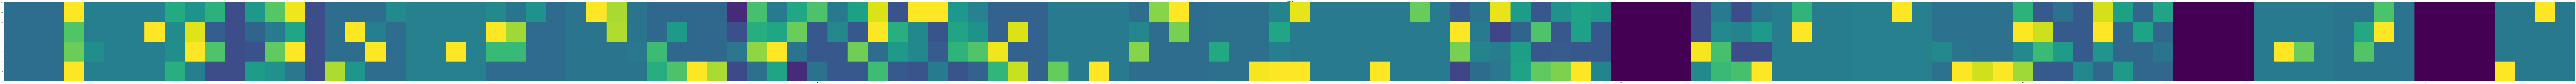

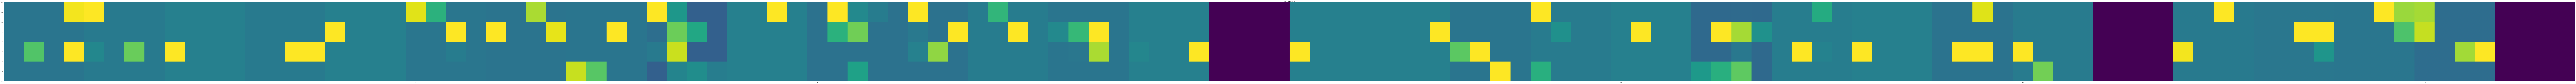

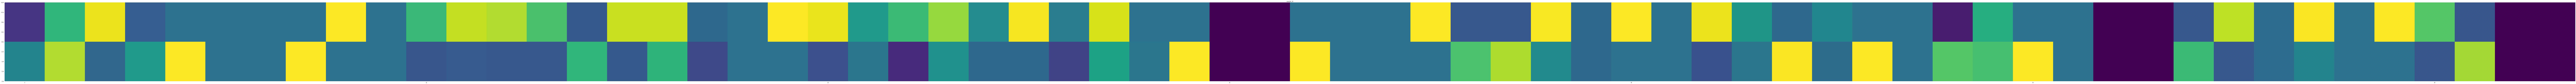

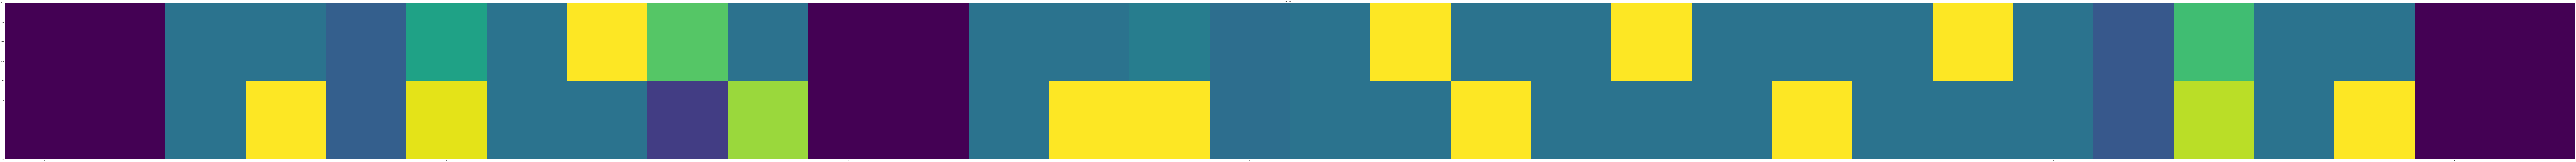

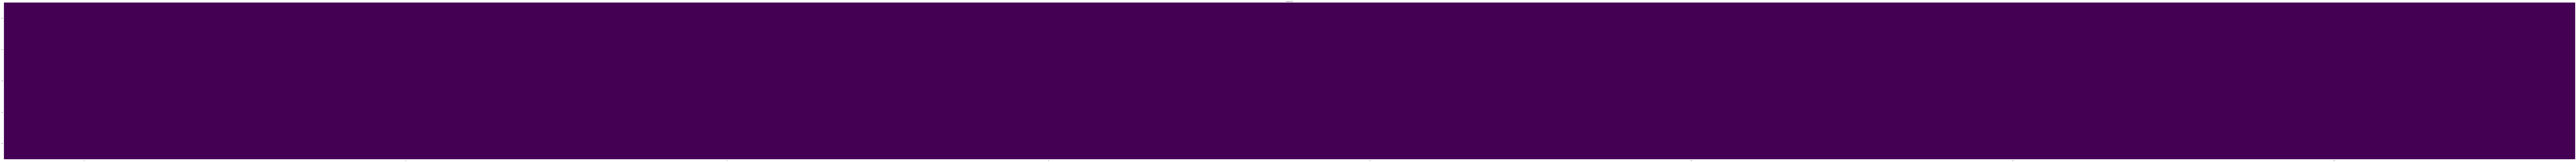

In [ ]:
import numpy as np
%matplotlib inline
for layer_names, feature_map in zip(layer_names, feature_map):
  print(feature_map.shape)
  if len(feature_map.shape)==4:
      channel=feature_map.shape[-1]
      size=feature_map.shape[1]
      display_grid=np.zeros((size,size*channel))
      for i in range(channel):
          x=feature_map[0,:,:,i]
          x-=x.mean()
          x/=x.std()
          x*=64
          x+=128
          x=np.clip(x,0,255).astype('uint8')
          display_grid[:,i*size:(i+1)*size]=x

      scale=20./channel
      plt.figure(figsize=(scale*channel*20,scale*20))
      plt.title(layer_names)
      plt.grid(False)
      plt.imshow(display_grid,aspect='auto',cmap='viridis')





In [ ]:
print(feature_map[0].shape)
if len(feature_map[0].shape)==4:
    channel=feature_map[0].shape[-1]
    size=feature_map[0].shape[1]
    display_grid=np.zeros((size,size*channel))
    for i in range(channel):
        x=feature_map[0][0,:,:,i]
        x-=x.mean()
        x/=x.std()
        x*=64
        x+=128
        x=np.clip(x,0,255).astype('uint8')
        display_grid[:,i*size:(i+1)*size]=x

    scale=(40./channel)*5
    plt.figure(figsize=(scale*channel,scale))
    plt.gcf().set_size_inches(15, 15)
    plt.title(layer_names,fontsize=15)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

(16, 128)


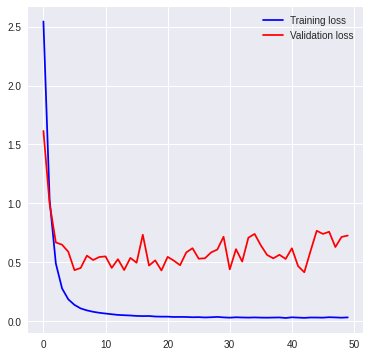

<Figure size 576x396 with 0 Axes>

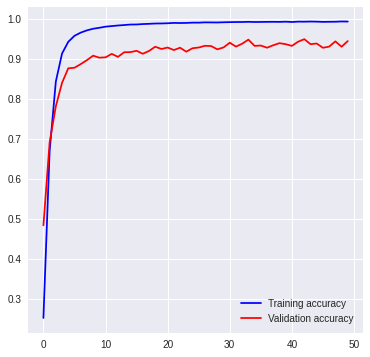

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()

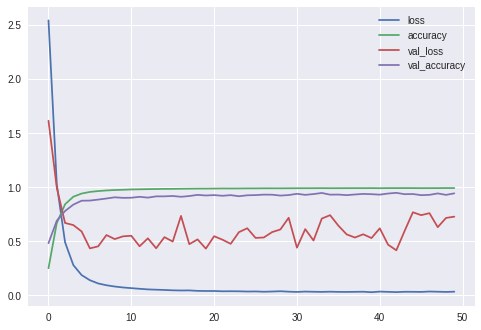

In [ ]:
pd.DataFrame(hist.history).plot()


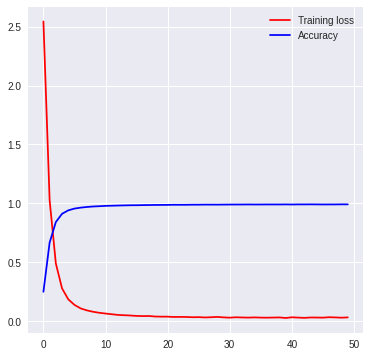

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='r', label="Training loss")
plt.plot(hist.history['accuracy'], color='b', label="Accuracy")
plt.legend()
plt.show()

(4, 4, 3, 64)
(64, 4, 4, 3)


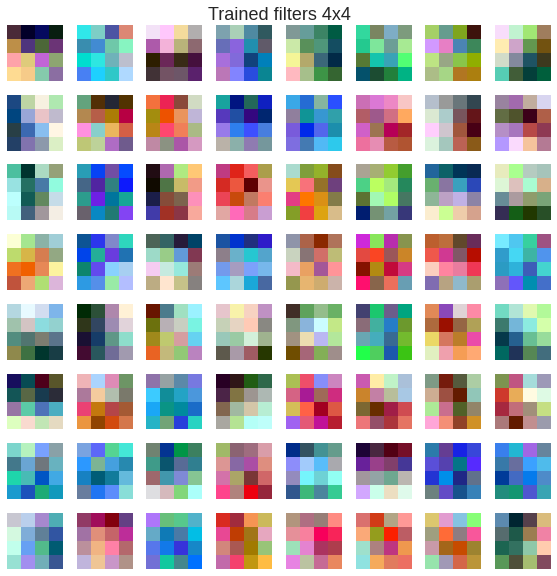

In [ ]:
w = model.get_weights()
print(w[0].shape)

# print(model[i].get_config())
# l = model[i].layers
# print(l[0].get_weights()[0].shape)

# Visualizing filters
temp = w[0].transpose(3, 0, 1, 2)
print(temp.shape)  # (81, 32, 32, 3)

    # Plotting
fig = plt.figure()
grid = convert_to_grid(temp)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
name = 'Trained filters ' + str(4) + 'x' + str(4)
plt.title(name, fontsize=18)
    
    # Showing the plot
plt.show()

# Saving the plot
name = 'filters-' + str(4) + 'x' + str(4) + '.png'
fig.savefig(name)
plt.close()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 32, 32, 3)
[5]


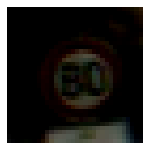

(43,)
ClassId: 5
Label: Speed limit (80km/h)


In [ ]:
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][6:7]
print(x_input.shape)
y_input = data['y_test'][6:7]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model.predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list

# Getting labels
labels = label_text('drive/MyDrive/Signs/label_names.csv')
print('Label:', labels[prediction])





553476096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


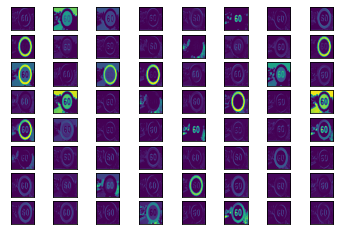

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model=VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('drive/MyDrive/Signs/60.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure
pyplot.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
Total params: 6,272
Trainable params: 6,272
Non-trainable params: 0
_________________________________________________________________
(1, 16, 16, 128)


TypeError: ignored

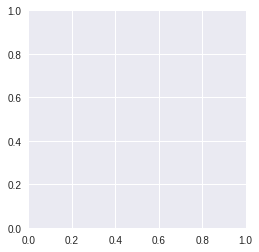

In [ ]:
from keras.models import Model
from matplotlib import pyplot
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img
%matplotlib inline
layer_out= model.layers[1].output
model_1= Model(inputs=model.input,outputs=layer_out)
model_1.summary()
image=load_img('drive/MyDrive/Signs/Sign_2.png')
image.show()
im1 = image.resize((32,32))
im1.show()
x = img_to_array(im1)
x.shape
x=x.reshape((1,32,32,3))
x=x/255 
# get feature map for first hidden layer
feature_maps_1 = model_1.predict(x)
'''
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure
pyplot.show()
'''
# Visualizing filters
temp = feature_maps_1.transpose(0,  1, 2,3)
print(temp.shape)  # (81, 32, 32, 3)

    # Plotting
fig = plt.figure()
grid = convert_to_grid(temp)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
name = 'Trained filters ' + str(4) + 'x' + str(4)
plt.title(name, fontsize=18)
    
    # Showing the plot
plt.show()

# Saving the plot
name = 'filters-' + str(4) + 'x' + str(4) + '.png'
fig.savefig(name)
plt.close()

In [ ]:
# import the Python Image
# processing Library
from PIL import Image
 
# Giving The Original image Directory
# Specified
Original_Image = Image.open("drive/MyDrive/Signs/Sign_2.png")
 
# Rotate Image By 30 Degree
rotated_image1 = Original_Image.rotate(30)
 
# This is Alternative Syntax To Rotate
# The Image
rotated_image2 = Original_Image.transpose(Image.ROTATE_90)
 
# This Will Rotate Image By 60 Degree
rotated_image3 = Original_Image.rotate(60)
 
rotated_image1.show()
rotated_image2.show()
rotated_image3.show()

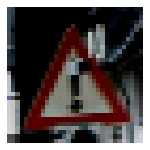

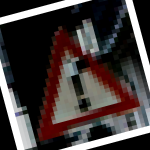

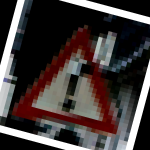

-1

In [ ]:
#аугментация версии 1
import cv2  # importing cv
import imutils
from google.colab.patches import cv2_imshow
 
# read an image as input using OpenCV
image = cv2.imread(r"drive/MyDrive/Signs/Sign_2.png")
cv2_imshow(image)
Rotated_image = imutils.rotate(image, angle=15)
Rotated1_image = imutils.rotate(image, angle=-15)
 
# display the image using OpenCV of
# angle 45
cv2_imshow( Rotated_image)
 
# display the image using OpenCV of
# angle 90
cv2_imshow( Rotated1_image)
 
# This is used for To Keep On Displaying
# The Image Untill Any Key is Pressed
cv2.waitKey(0)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

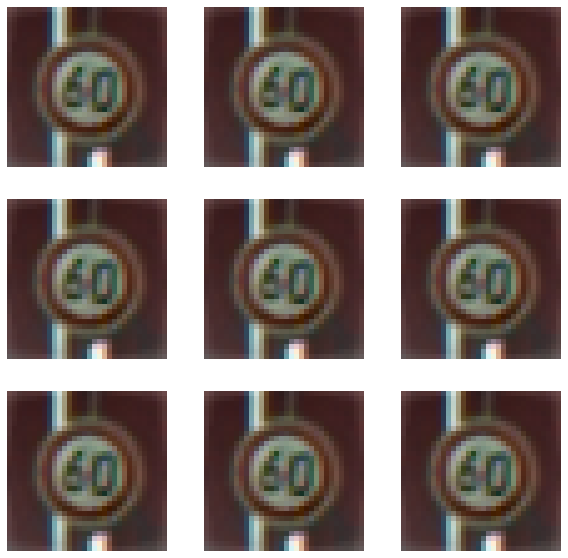

In [ ]:
#аугментация версии 2
#for image, _ in x_train[161:162, :, :, :].take(1):
plt.figure(figsize=(10, 10))
  #first_image = image[0]
image = x_train[164:165, :, :, :]
exp = convert_to_grid(image)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(exp, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_x = preprocess_input(x_train) 
test_x = preprocess_input(x_test)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(500, activation='relu')
dense_layer_2 = layers.Dense(100, activation='relu')
#Dropout(0.5)
prediction_layer = layers.Dense(43, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True)

model.fit(train_x, y_train, epochs=40, batch_size=200, validation_data = (x_val, y_val))#validation_split=0.2 callbacks=[es],

Epoch 1/50
240/435 [===============>..............] - ETA: 6:39 - loss: 3.9384 - accuracy: 0.0231

In [ ]:
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
IMAGE_SIZE = [32, 32]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(43, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer="adam",
                    metrics=['accuracy'])
model.summary()
STEP_SIZE_TRAIN=train_count//8
STEP_SIZE_VALID=val_count//8
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]
start = datetime.now()
history = model.fit(x_train, y_train,
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs = 18, verbose=5, 
                    validation_data = (x_val,y_val), 
                    validation_steps = STEP_SIZE_VALID)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/18
Epoch 2/18
Epoch 3/18
Epoch 4/18
Epoch 5/18
Epoch 6/18
Epoch 7/18
Epoch 8/18
Epoch 9/18
Epoch 10/18
Epoch 11/18
Epoch 12/18
Epoch 13/18
Epoch 14/18
Epoch 15/18
Epoch 16/18
Epoch 17/18
Training completed in time:  0:21:24.256936


In [ ]:
score = model.evaluate(x_train)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2719/2719 [==============================] - 6s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Loss: 0.0
Test accuracy: 0.0


In [ ]:
IMAGE_SIZE = (32, 32)
IMG_SHAPE = IMAGE_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)
inputs = tf.keras.Input(shape=(32, 32, 3))
x = preprocess_input(x_train)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

InternalError: ignored

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()